# Teste de Wilcoxon - Frederick Caldas
## Baseado no livro _Introduction to Statistics: The Nonparametric Way - Gottfried E. Noether_
### Este é um estudo cuja finalidade consiste, fundamentalmente, em fixar conhecimentos estatísticos, exercitando também a prática da programação em Python. Desta maneira, embora existam funções mais adequadas para a realização do teste, a maneira que segue abaixo é preferível para fins didáticos.

## Carregamento de _Libraries_

In [22]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from math import sqrt

## Gerando Dados Aleatórios
Para o presente estudo, estaremos simulando o desempenho de alunos divididos em dois grupos: <br>
**Grupo de controle X:** Não faz cursinho <br>
**Grupo experimental Y:** faz cursinho <br>
Ao fim do estudo, estaremos interessados em responder se o desempenho dos alunos é afetado positivamente graças ao cursinho. Este mesmo cenário foi utilizado no livro de Noether ao longo dos capítulos 6 e 7.

In [2]:
# Definindo parâmetros
media1 = 5
media2 = 6
desvio_padrao1 = 2
desvio_padrao2 = 2.3
tamanho = 1000

# Gerando dados aleatórios que sigam uma distribuição normal
dados1 = np.random.normal(loc=media1, scale=desvio_padrao1, size= tamanho)
dados2 = np.random.normal(loc=media2, scale=desvio_padrao2, size=tamanho)

# Garantindo que os dados estejam no intervalo de 0 a 10
X_grupo_controle = np.clip(dados1, 0, 10)
Y_grupo_experimental = np.clip(dados2, 0, 10)

### Visualizando Distribuição dos Dados
Como o esperado pelos códigos aplicados acima, buscamos visualizar o quão conforme a uma distribuição normal aparentam estar os dados gerados aleatoriamente.

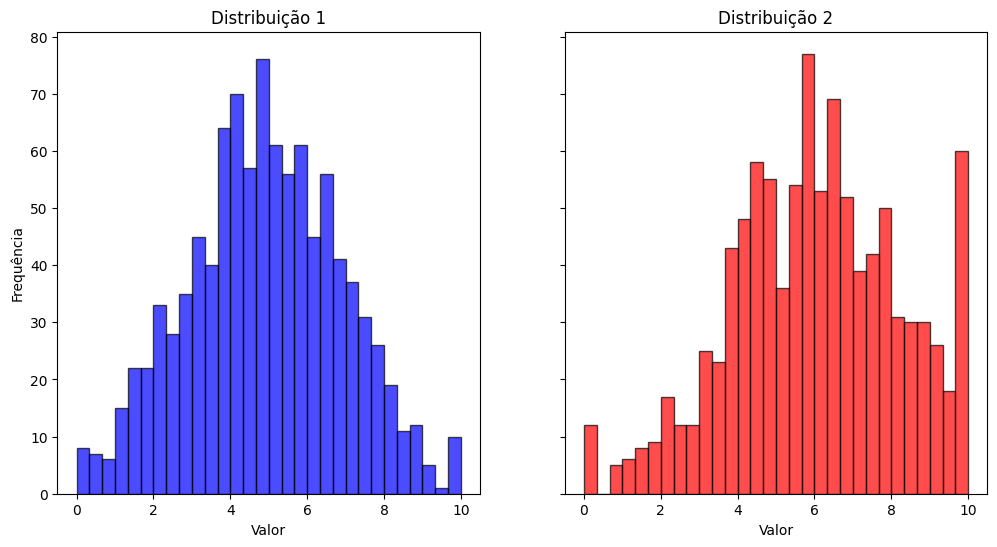

In [3]:
# gerando figura que comportará dois plots justapostos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plotando o primeiro histograma
ax1.hist(X_grupo_controle, bins=30, color='blue', edgecolor='k', alpha=0.7)
ax1.set_title('Distribuição 1')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Frequência')

# Plotando o segundo histograma
ax2.hist(Y_grupo_experimental, bins=30, color='red', edgecolor='k', alpha=0.7)
ax2.set_title('Distribuição 2')
ax2.set_xlabel('Valor')
plt.show()

### Visualizando tabela de dados
Em seguida, podemos converter os dados em formato de DataFrame, facilitando assim manipulações posteriores.


In [4]:
# Gerando tabelas com os dados gerados aleatoriamente
X_controle_df = pd.DataFrame(X_grupo_controle, columns=['Notas sem cursinho'])
Y_experimental_df = pd.DataFrame(Y_grupo_experimental, columns=['Notas com cursinho'])

# Verificando um dado da tabela
Y_experimental_df.iloc[1,0]

5.474729152155541

### Construindo o teste de Wilcoxon de duas amostras
Iniciando efetivamente a aplicação do teste Wilcoxon, em primeiro lugar, procuramos verificar se os dados do grupo experimental são predominantemente maiores do que aqueles observados no grupo de controle. Com base neste propósito, a estratégia a ser adotada consiste em contabilizar, para cada valor observado i de Y, a quantos valores observados j de X este i é maior. Tal contagem vai designada como U_mais.

In [17]:
# Construindo o teste de Wilcoxon
U_mais = 0
U_menos = 0
U_zero = 0

for i in range(len(Y_experimental_df)):
    for j in range(len(X_controle_df)):
        if Y_experimental_df.iloc[i,0] > X_controle_df.iloc[j,0]:
            U_mais += 1
        else:
            if Y_experimental_df.iloc[i,0] < X_controle_df.iloc[j,0]:
              U_menos += 1
            else:
              U_zero += 1

# Interpretando etapa inicial
if U_mais > U_menos:
    print("Há alguma evidência de que os cursinhos afetam positivamente a nota dos alunos.")
elif U_mais < U_menos:
    print("Há alguma evidência de que os cursinhos afetam negativamente a nota dos alunos.")
else:
    print("Não há evidência de que o cursinho afeta a nota dos estudantes.")

Há alguma evidência de que os cursinhos afetam positivamente a nota dos alunos.


In [18]:
print(U_mais, U_menos, U_zero)

647561 352281 158


### Validação da Etapa Anterior
Com a finalidade de averiguar a correção dos cálculos acima, precisamos garantir que, após a execução das contas, o número de observações iguais entre os grupos seja compatível com o tamanho dos grupos iniciais e o número das demais contagens realizadas.

In [19]:
n = len(Y_experimental_df)
m = len(X_controle_df)

# Verificando se a etapa precedente foi bem sucedida. (É preciso que resto = U_zero)
resto = n * m - (U_mais + U_menos)
resto

158

### Testando a Hipótese
Uma vez obtidos os números sobre os quais se baseiam o teste de Wilcoxon, isto é, considerando a quantidade de vezes em que os valores do grupo experimental supera os valores do grupo de controle, bem como o tamanho das amostras, podemos estimar qual a probabilidade de que este aumento dos valores do grupo experimental sejam oriundos do mero acaso ao qual todo procedimento de extrações aleatórias está sujeito. Como resulta desta etapa, vemos que as chances são a tal ponto remotas, que podemos rejeitar a hipótese nula (a saber que o aumento do desempenho seja fruto do acaso).

In [ ]:
# Criando modelo probabilístico que segue uma distribuição normal
mi = (1/2) * m * n
sigma = sqrt(m * n * (m + n + 1) /12)

distr_norm = stats.norm(loc= mi, scale=sigma)

# Definindo qual será a hipótese alternativa: no caso, a hipótese alternativa será Y > X (portanto, U = U_menos)
U = U_menos


z_valor = (U - mi)/sigma
z_valor

# Calculando probabilidade acumulada através de uma distribuição normal padrão
probabilidade_acumulada = stats.norm.cdf(z_valor)
format(probabilidade_acumulada, '.50f') #Verificando o p_valor sem notação científica

# Estabelecendo nível de significância
alpha = 0.05

if probabilidade_acumulada < alpha:
  print("Como o p-valor resulta menor do que o nível de significância, podemos rejeitar a hipótese nula.")